<center>
    <tr>
        <td><img src="data/ontario-tech-univ-logo.png" width="25%"></img></td>
     </tr>
</center>

# Image filtering

Faisal Qureshi\
Professor\
Faculty of Science\
Ontario Tech University\
Oshawa ON Canada\
http://vclab.science.ontariotechu.ca

## **Outline**


*   Gaussian blurring
*   Separability

In [6]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

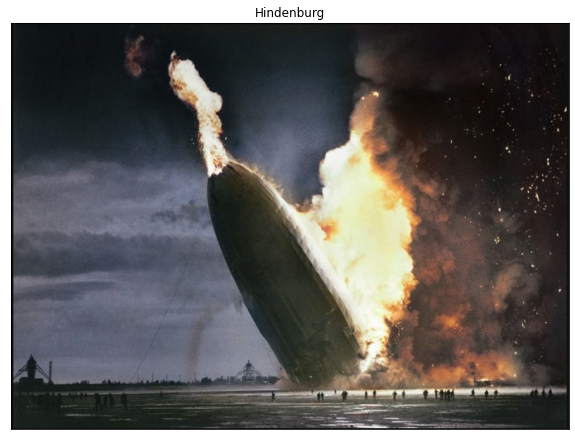

In [59]:
img = cv.imread('data/hindenburg.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.title('Hindenburg')
plt.imshow(img)
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

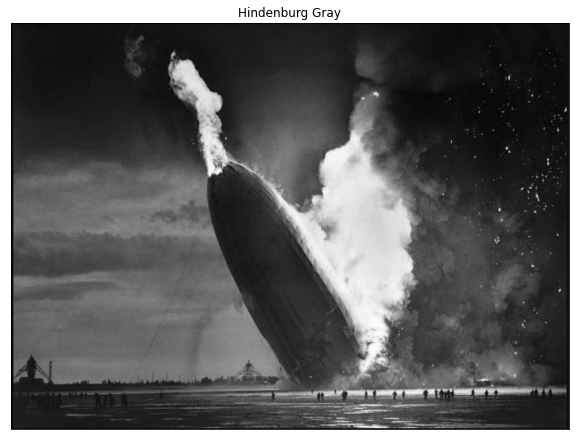

In [58]:
#Image in gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.title('Hindenburg Gray')
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])

### **Task 1: Construction**

Construct and visualize a 11x11 Gaussian kernel for $\sigma = [1,3,5]$

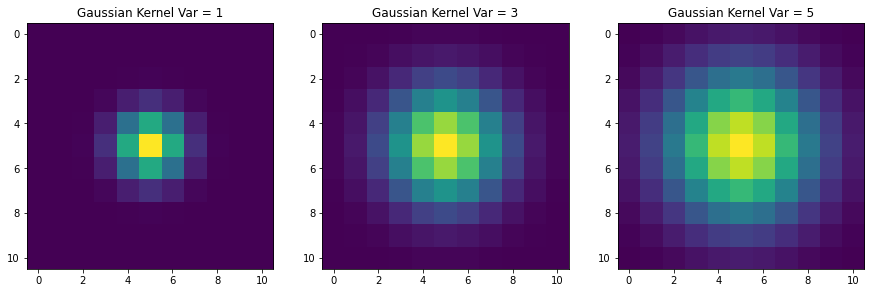

In [51]:
def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = n//2
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc

    return gaussian2_xy(mean, cov, xy), xc, yc

def gaussian2D(var, n):
    mean =  np.array([0, 0])
    mean = mean.reshape(2,1)
    cov = np.array([[var,0],[0,var]])
    k, xc, yc = gaussian2_n(mean, cov, n)
    return k



#size of matrix
width = 11

#Construct an 11X11 Gaussian kernel
gaussian_kernel_var_1 = gaussian2D(1, width)#variance is 1
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Gaussian Kernel Var = 1')
plt.imshow(gaussian_kernel_var_1)

gaussian_kernel_var_3 = gaussian2D(3, width)#variance is 3
plt.subplot(132)
plt.title('Gaussian Kernel Var = 3')
plt.imshow(gaussian_kernel_var_3)


gaussian_kernel_var_5 = gaussian2D(5, width)#variance is 5
plt.subplot(133)
plt.title('Gaussian Kernel Var = 5')
plt.imshow(gaussian_kernel_var_5)

### **Task 2: Convolution**

Convolve the hidenburg image with the three Gaussian kernels and show the results

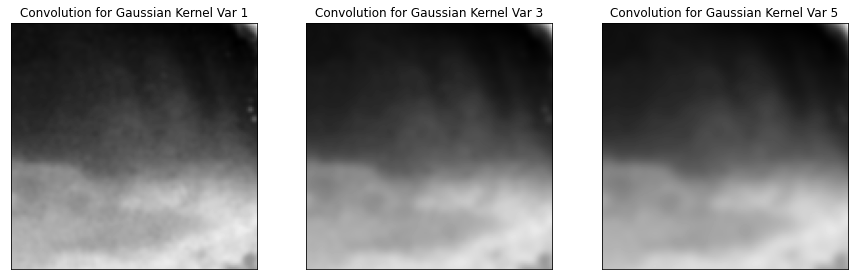

In [63]:
img_gauss_var_3 = sp.signal.convolve2d(img_gray, gaussian_kernel_var_3, mode='same', boundary='fill')
img_gauss_var_1 = sp.signal.convolve2d(img_gray, gaussian_kernel_var_1, mode='same', boundary='fill')
img_gauss_var_5 = sp.signal.convolve2d(img_gray, gaussian_kernel_var_5, mode='same', boundary='fill')

#Generate plots
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Convolution for Gaussian Kernel Var 1')
plt.xticks([])
plt.yticks([])
plt.imshow(img_gauss_var_1, cmap='gray')
#checking the pixels
plt.imshow(img_gauss_var_1[100:228,100:228], cmap='gray')

plt.subplot(132)
plt.title('Convolution for Gaussian Kernel Var 3')
plt.xticks([])
plt.yticks([])
plt.imshow(img_gauss_var_3, cmap='gray')
#checking the pixels
plt.imshow(img_gauss_var_3[100:228,100:228], cmap='gray')

plt.subplot(133)
plt.title('Convolution for Gaussian Kernel Var 5')
plt.xticks([])
plt.yticks([])
plt.imshow(img_gauss_var_5, cmap='gray')
#checking the pixels
plt.imshow(img_gauss_var_5[100:228,100:228], cmap='gray')

### **Task 3: Separability**

Consider the following kernel.

$\begin{bmatrix}
    7 & 3 & 4 \\
    0 & 0 & 0 \\
    -7 &-34 & -3 \\
  \end{bmatrix}
$

Confirm that it is separable. Convolve the hindenburg image with this kernel. Next, explot separability to convolve the hindenburg image. Compare the results. Are they the same, or different.

F=
[[  7   3   4]
 [  0   0   0]
 [ -7 -34  -3]]
2
Singular values of F are: [35.16885284  7.15204796  0.        ]
[[-0.13881594 -0.9903182   0.        ]
 [ 0.          0.         -1.        ]
 [ 0.9903182  -0.13881594  0.        ]]
[[-0.22474259 -0.9692459  -0.10026538]
 [-0.83339987  0.24451561 -0.49563775]
 [-0.50491131  0.02782976  0.86272248]]
Filter F is not separable


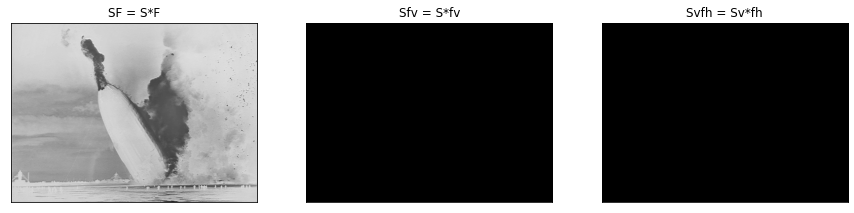

In [77]:
F = np.array([7,3,4,0,0,0,-7,-34,-3]).reshape(3,3)
print('F=\n{}'.format(F))
print(np.linalg.matrix_rank(F))

u, s, vh = np.linalg.svd(F)
print(f'Singular values of F are: {s}')

print(u)
print(vh)

if s[~np.isclose(s, 0)].shape == (1,):
    print('Filter F_original is separable')
    ind = np.where(np.isclose(s, 0) == False)[0][0]
    s_1 = s[~np.isclose(s, ind)]
    fv = np.sqrt(s_1)*u[:,ind].reshape(3,1)
    fh = np.sqrt(s_1)*vh[ind,:].reshape(1,3)
    print('fv:\n {}'.format(fv))
    print('fh:\n {}'.format(fh))
    print('F_reconstructed:\n {}'.format(np.dot(fv, fh)))
    
else:
    print('Filter F is not separable')
    
SF = sp.signal.convolve2d(img_gray, F, mode='same', boundary='fill')
Sfv = sp.signal.convolve2d(img_gray, fv, mode='same', boundary='fill')
Svfh = sp.signal.convolve2d(Sfv, fh, mode='same', boundary='fill')

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('SF = S*F')
plt.xticks([])
plt.yticks([])
plt.imshow(SF, cmap='gray')

plt.subplot(132)
plt.title('Sfv = S*fv')
plt.xticks([])
plt.yticks([])
plt.imshow(Sfv, cmap='gray')


plt.subplot(133)
plt.title('Svfh = Sv*fh')
plt.xticks([])
plt.yticks([])
plt.imshow(Svfh, cmap='gray')